#  Loan Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [303]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [304]:
df = pd.read_csv(r"C:\Users\HP\Desktop\loan_prediction.csv",engine='python')

In [305]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [307]:
df.shape

(614, 13)

In [308]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

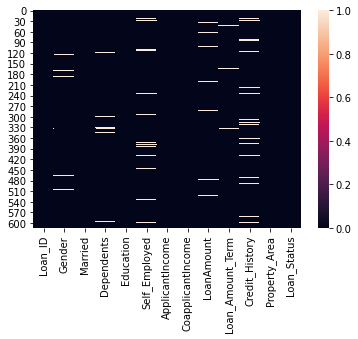

In [309]:
sns.heatmap(df.isna())

In [310]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [311]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

over all we have-->>>>>>>>

Size of training set: 614 records

target variable is 'loan status'

there are few null values in the dataset

__feature processing__

__Loan_id__

In [312]:
df.Loan_ID.value_counts()

LP001086    1
LP002587    1
LP002100    1
LP001891    1
LP002367    1
           ..
LP002933    1
LP001572    1
LP001560    1
LP001800    1
LP002949    1
Name: Loan_ID, Length: 614, dtype: int64

AS this loan id is irrelevent to dataset,so let us drop this column 

In [313]:
df.drop('Loan_ID',1,inplace=True)

In [314]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Chech the correlations of the features with the dataset

In [315]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

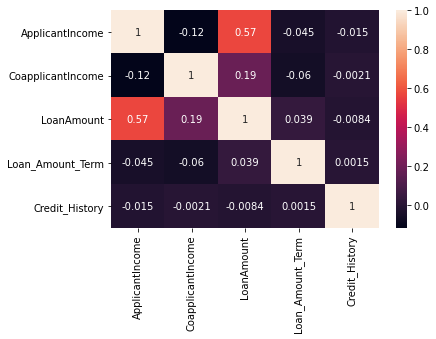

In [316]:
sns.heatmap(df.corr(),annot=True)

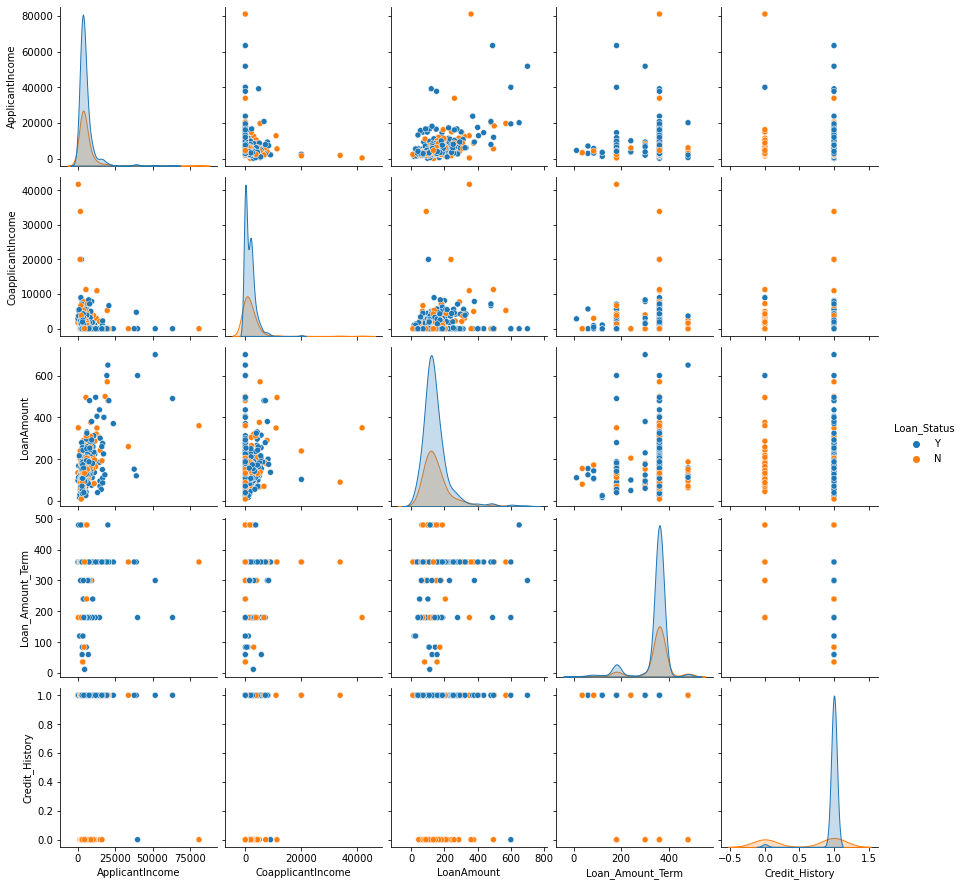

In [317]:
sns.pairplot(df,hue='Loan_Status',diag_kind='kde')

Most of the features are highly positively skewed

## Gender:

<AxesSubplot:xlabel='Gender', ylabel='count'>

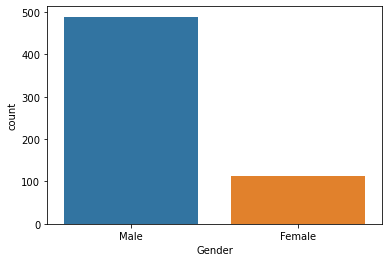

In [318]:
sns.countplot(df.Gender)

* Number of male applicant are more than females.

In [319]:
countmale = len(df[df.Gender == 'Male'])
print("Percentage of male: {:.2f}%".format((countmale / (len(df.Gender))*100)))

Percentage of male: 79.64%


almost 80 % are male in the dataset.

# Married:

<AxesSubplot:xlabel='Married', ylabel='count'>

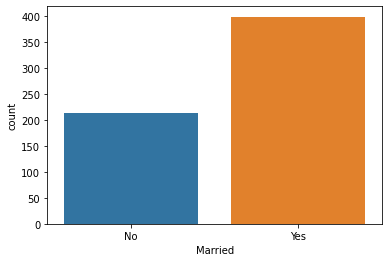

In [320]:
sns.countplot(df.Married)

In [321]:
countyes = len(df[df.Married == 'Yes'])
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.Married))*100)))

Percentage of yes: 64.82%


The number of married applicant are greater than Unmarried apllicants.

# Dependence:

<AxesSubplot:xlabel='Dependents', ylabel='count'>

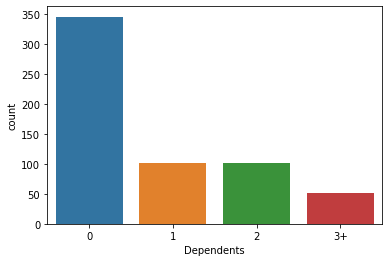

In [322]:
sns.countplot(df.Dependents,order=df.Dependents.value_counts().index)

Dependence is a categorical value

0: No one is depedent of the applicant

1: 1 people are dependent of the applicant.

2: 2 people are dependent of the applicant.

3+: 3 or more than 3 people are dependent of the applicant.


# Education

<AxesSubplot:xlabel='Education', ylabel='count'>

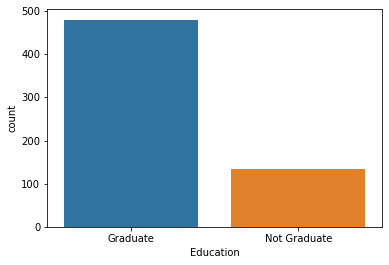

In [323]:
sns.countplot(df.Education)

In [324]:
countgraduate = len(df[df.Education == 'Graduate'])
print("Percentage of graduate: {:.2f}%".format((countgraduate / (len(df.Education))*100)))

Percentage of graduate: 78.18%


almost 78% people are graduated and The number of Graduates applying for the loan in higher than the Non-Grads.

# Self-Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

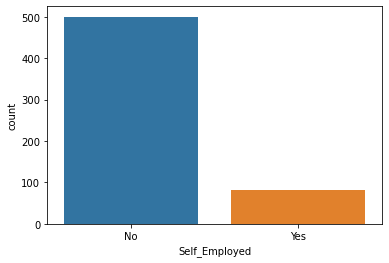

In [325]:
sns.countplot(df.Self_Employed)

In [326]:
countno = len(df[df.Self_Employed == 'No'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.Self_Employed))*100)))

Percentage of no: 81.43%


more than 80% are not self employed thats why number of people are applying for loan who are working and  a business-man one  need Capitals, for that you need loans, which are taken from the mostly banks.

# Applicant Income

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

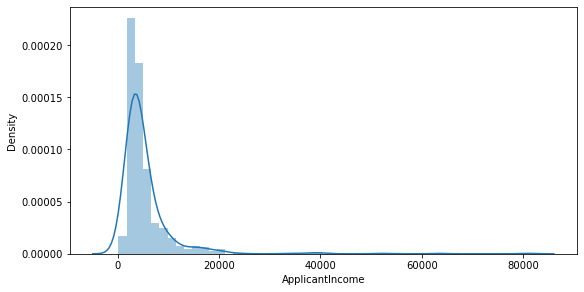

In [327]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df.ApplicantIncome)

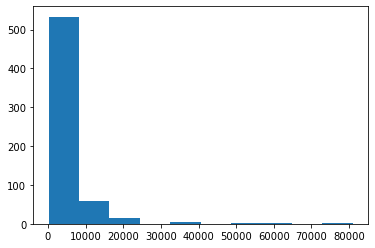

In [328]:
fig.add_subplot(122)
plt.hist(df.ApplicantIncome);

<AxesSubplot:xlabel='ApplicantIncome'>

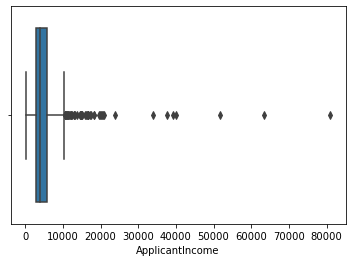

In [329]:
sns.boxplot(df.ApplicantIncome,orient='v')

There are some outliers in the Income feature.
Most of the people have thier income under 20K.

In [330]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

difference in 75% to max is huge means
We have an applicant whose imcome is more than 80K, who is potential of taking a huge loan.
This applicant should is either likely to be a great customer or a fraud.

# Co-applicant Income:

co applicant is a person who applied along with the person who is borrower

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

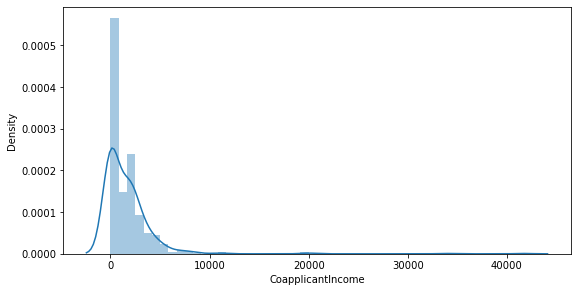

In [331]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df.CoapplicantIncome)

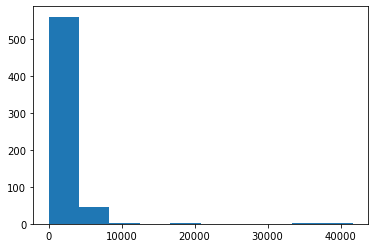

In [332]:
fig.add_subplot(122)
plt.hist(df.CoapplicantIncome);

<AxesSubplot:xlabel='CoapplicantIncome'>

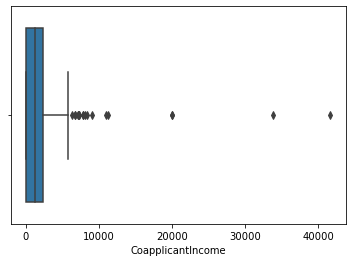

In [333]:
sns.boxplot(df.CoapplicantIncome,orient='v')

In [334]:
df.CoapplicantIncome.value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [335]:
df.CoapplicantIncome.value_counts()/len(df) * 100

0.0       44.462541
1666.0     0.814332
2083.0     0.814332
2500.0     0.814332
1750.0     0.488599
            ...    
7166.0     0.162866
2138.0     0.162866
2166.0     0.162866
3541.0     0.162866
3021.0     0.162866
Name: CoapplicantIncome, Length: 287, dtype: float64

* as you can see that around 45 percent of the Applicants either do not have a Co-applicant or the Co-applicant isn't Working.

In [336]:
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

difference in 75% to max is huge means
We have an coapplicant whose imcome is more than 40K, who is potential of taking a huge loan.
This coapplicant should is either likely to be a great customer or a fraud.

# LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

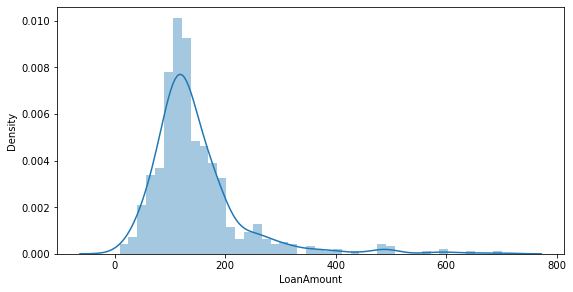

In [337]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df.LoanAmount)

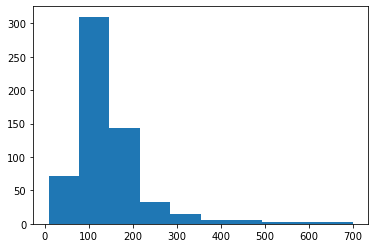

In [338]:
fig.add_subplot(122)
plt.hist(df.LoanAmount);

<AxesSubplot:xlabel='LoanAmount'>

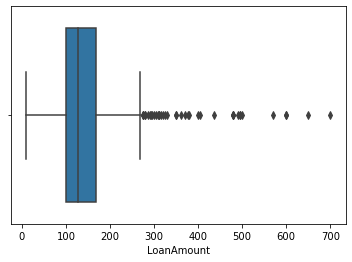

In [339]:
sns.boxplot(df.LoanAmount,orient='v')

In [340]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [341]:
df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

again difference between 75% to max is high , bank should look towards it

and also dropping null values in loanamount

In [342]:
df.dropna().sort_values('LoanAmount',ascending=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
487,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
555,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
94,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
14,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


__Loan_Amount_Term__

loan amount term is the period to pay back the load amount with interest 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

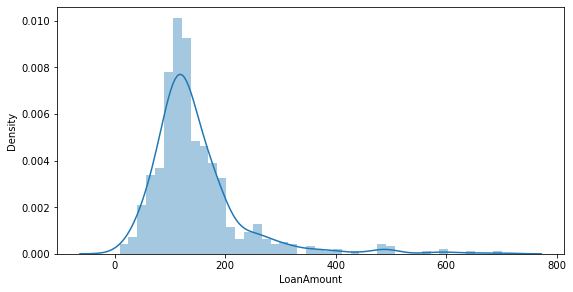

In [343]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)
sns.distplot(df.LoanAmount)

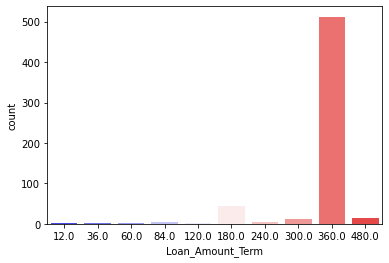

In [344]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="bwr")
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

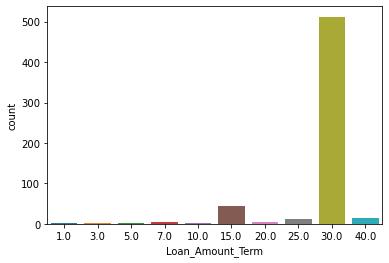

In [345]:
# it's better to visualize it in the years instead of months sometimes.
fig.add_subplot(221)
sns.countplot(df.Loan_Amount_Term/12)

* Most of the poeple apply for loan_amount_term as 360 months (30 years)

In [346]:
# let's ge the avearge loan amount the client applied for 360 months
df[df.Loan_Amount_Term == 360]['LoanAmount'].median()

129.0

This amount of loan (around 1,30,000) is mostly taken by an applicant on an average

# Credit_History

In [347]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

here it indicated Positive or Negative credit history.
  * 1: Positive Credit History.
  * 0: Negative Credit History.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

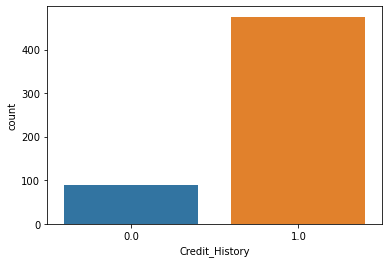

In [348]:
sns.countplot(df.Credit_History)

In [349]:
pd.DataFrame(np.array(list(zip(df.Credit_History.value_counts().index.map({0:'Negative(0)',1:'Positive(1)'}),df.Credit_History.value_counts(),df.Credit_History.value_counts()/len(df)*100))),columns=['Credit_History','Applicants','Percentage_of_Applicants']).set_index('Credit_History')

,Applicants,Percentage_of_Applicants
Credit_History,,
Positive(1),475,77.36156351791531
Negative(0),89,14.495114006514658


Around 15 percent of the total applicants ahve negative credit_history,
Credit history becomes negative if a person does not pay his bills.

if you will see with respect to actual loan status

In [350]:
df[df.Credit_History == 0]['Loan_Status'].value_counts()/len(df[df.Credit_History == 0]) * 100

N    92.134831
Y     7.865169
Name: Loan_Status, dtype: float64

people having negative credit report have less chances to get loan from bank and if we check 7 % getting loan

In [351]:
df[((df.Credit_History == 0) & (df.Loan_Status == 'Y'))]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


One of those is an applicant with Income of 40,000, the applicant  has opted for the highest amount of loan the bank offers with no Co-applicant involve.

* The bank should definietly reviews these applicants again.


# property area

* This is the region where the property of the applicant is present (as a collateral for the loan).


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

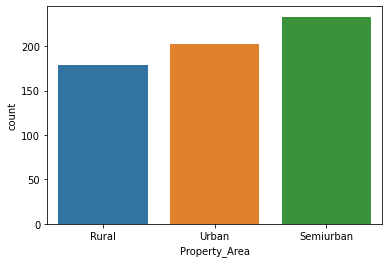

In [352]:
sns.countplot(df.Property_Area,order=df.Property_Area.value_counts().index[::-1])

In [353]:
countrural = len(df[df.Property_Area == 'Rural'])
counturban = len(df[df.Property_Area == 'Urban'])
countsemi = len(df[df.Property_Area == 'Semiurban'])
print("Percentage of rural: {:.2f}%".format((countrural / (len(df.Property_Area))*100)))
print("Percentage of urban: {:.2f}%".format((counturban / (len(df.Property_Area))*100)))
print("Percentage of semi urban: {:.2f}%".format((countsemi / (len(df.Property_Area))*100)))

Percentage of rural: 29.15%
Percentage of urban: 32.90%
Percentage of semi urban: 37.95%


property area within people is almost equal

# Loan_Status

this is the target value

loan status indicated that whether loan approved or not

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

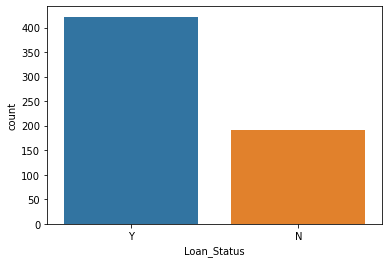

In [354]:
sns.countplot(df.Loan_Status)

In [355]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [356]:
df.Loan_Status.value_counts()/len(df) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

in the dataset almost 68 percent of the loans were approved and the rest were declined.

## Multi-variate Analysis


In [357]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

let us fill the null values via median

In [358]:
df.fillna(df.median(),inplace=True)

In [359]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [360]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
#Lets consider the people who didn't disclosed their marriages might be diveroced or seperated or single
df['Married'].fillna('No', inplace=True)
df['Dependents'].fillna(0, inplace=True)
df["Self_Employed"].fillna('No', inplace=True)


In [361]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [362]:
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


(0.0, 25000.0)

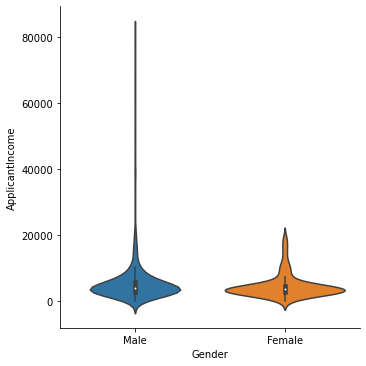

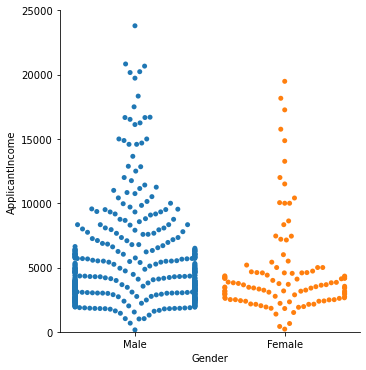

In [363]:
sns.catplot('Gender','ApplicantIncome',data=df,kind='violin')

sns.catplot('Gender','ApplicantIncome',data=df,kind='swarm')
plt.ylim([0,25000])

* Most of the applicant have a salary under 6K.

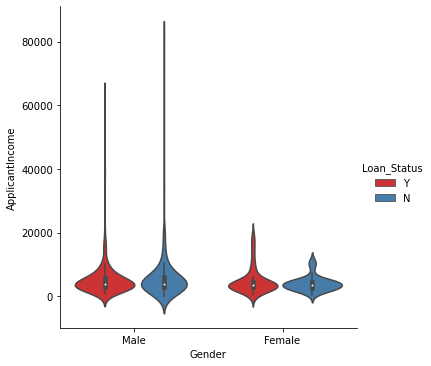

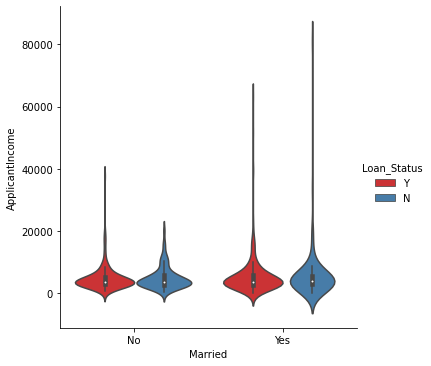

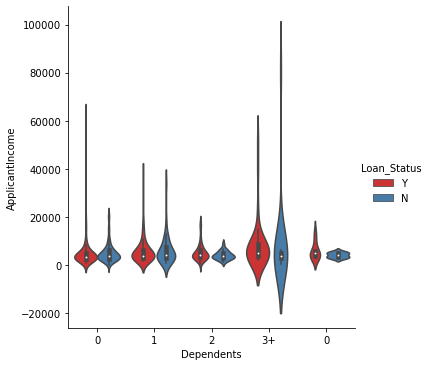

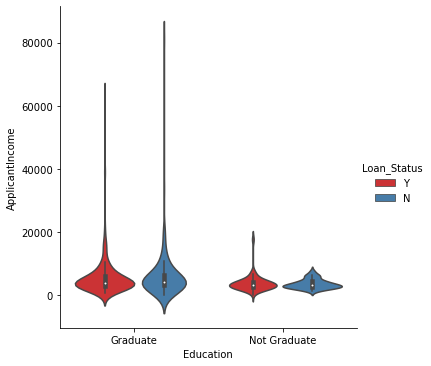

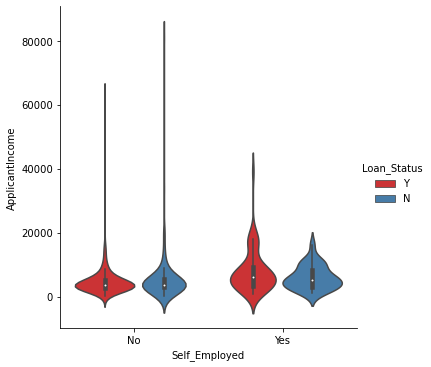

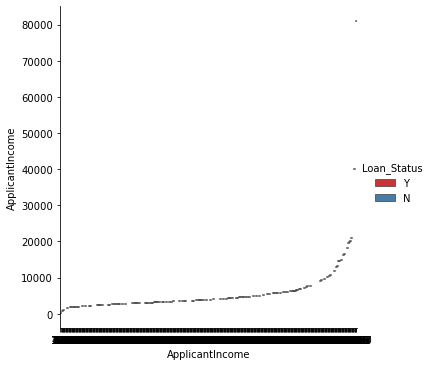

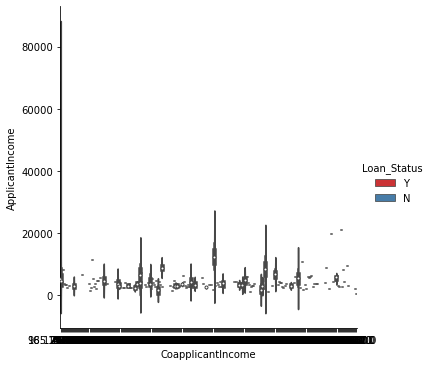

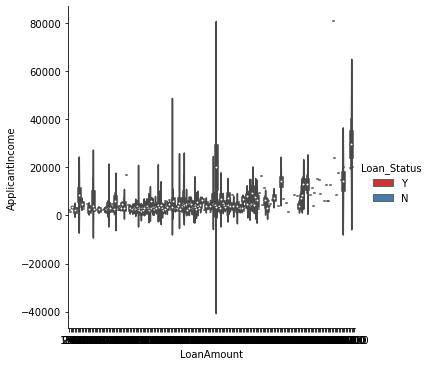

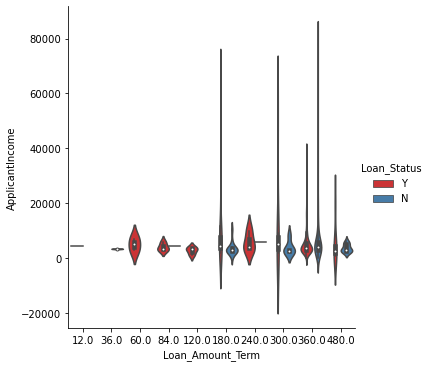

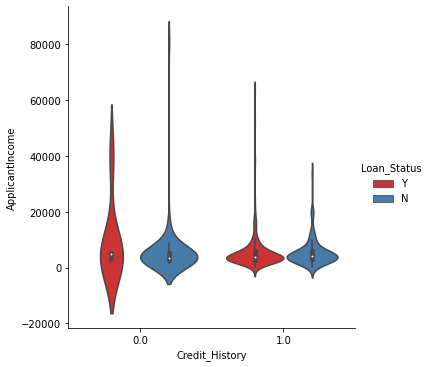

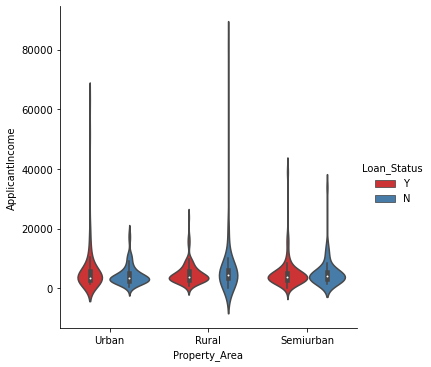

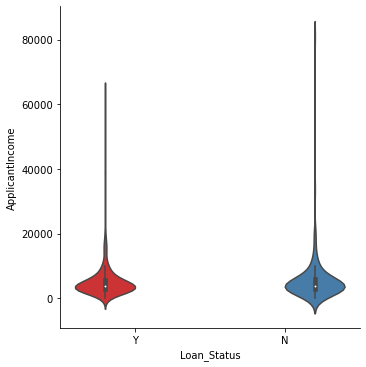

In [364]:
for fea in df:
    sns.catplot(x=fea, y="ApplicantIncome",hue='Loan_Status',data=df, kind='violin',palette='Set1')


From the above sets of graph we can see that the males have silghtly higher chances of Loan approval, and Married people also have high chances for approval as total income is high compare to unmarried applicant,most of gradutaes have loan approvals althouth people with high income has loan status as no, might be because of credit score and as most of properties of applicants with high income are from rural areas.


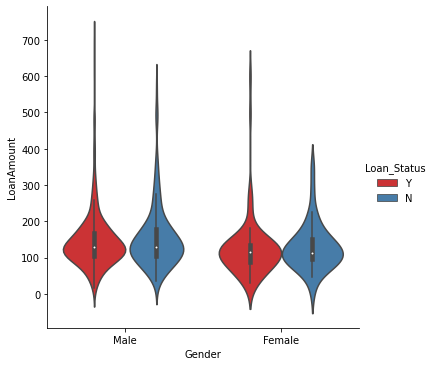

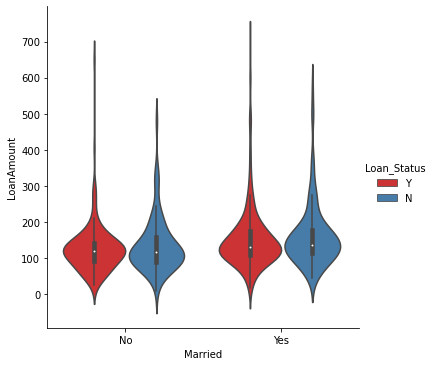

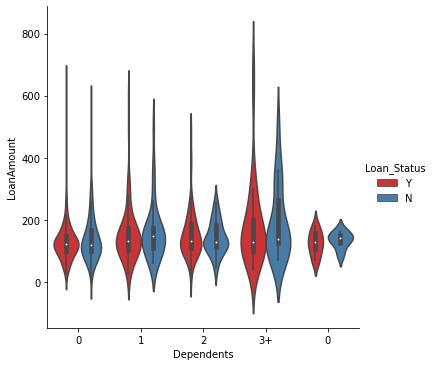

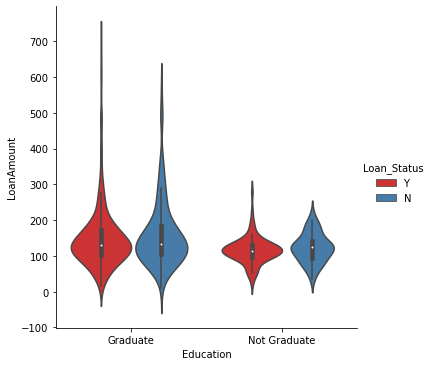

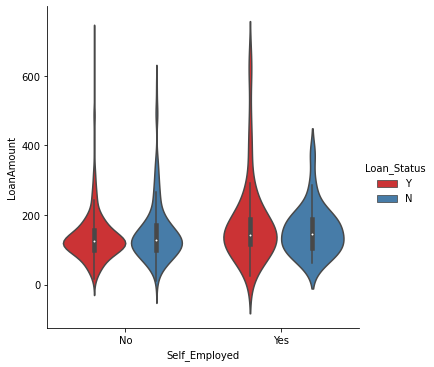

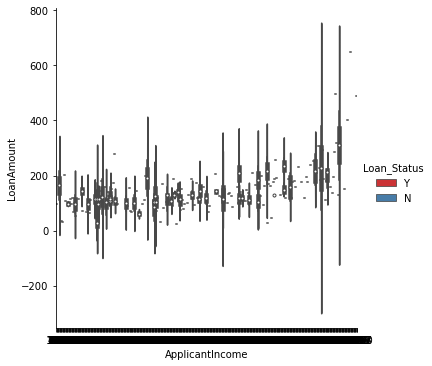

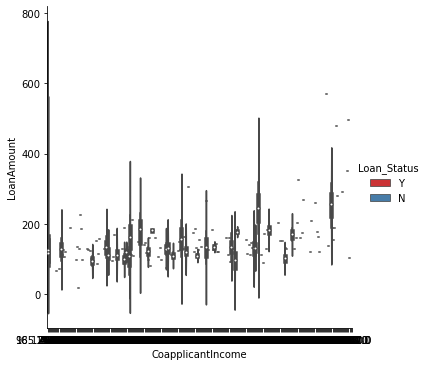

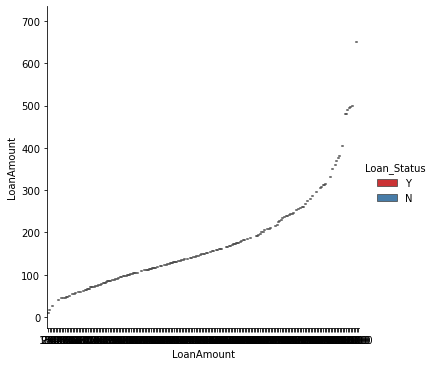

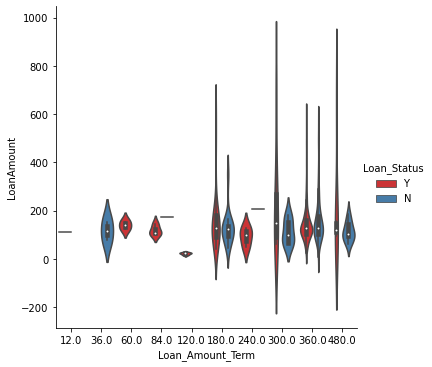

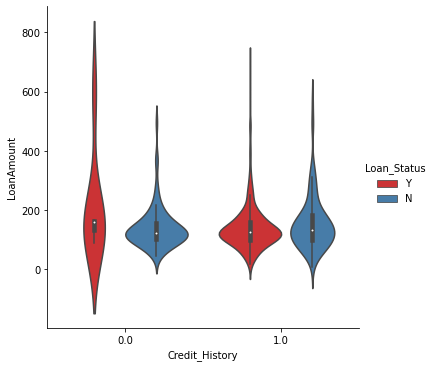

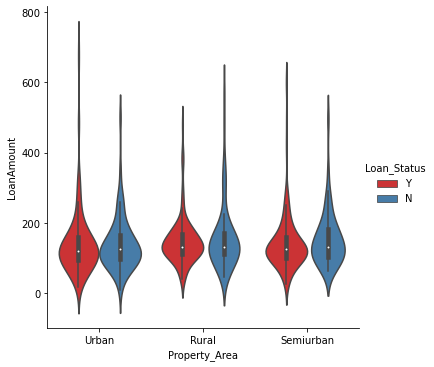

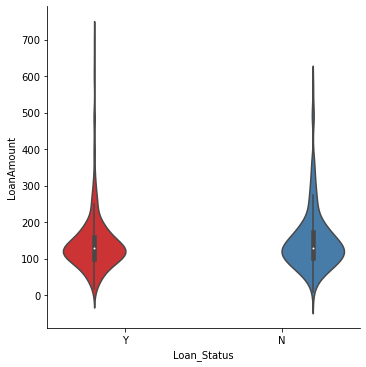

In [365]:
for fe in df:
    sns.catplot(x=fe,y='LoanAmount',hue='Loan_Status',data=df,kind='violin',palette='Set1')

From the above sets of graph we can see that males have got loan approval for more than 200, and most of married applicants were approved for more than 200, most of graduates have got loan approval for more than 200, most of the applicants who got more than 200 are self employed might have own buissness, urban areas people have highest loan amount.

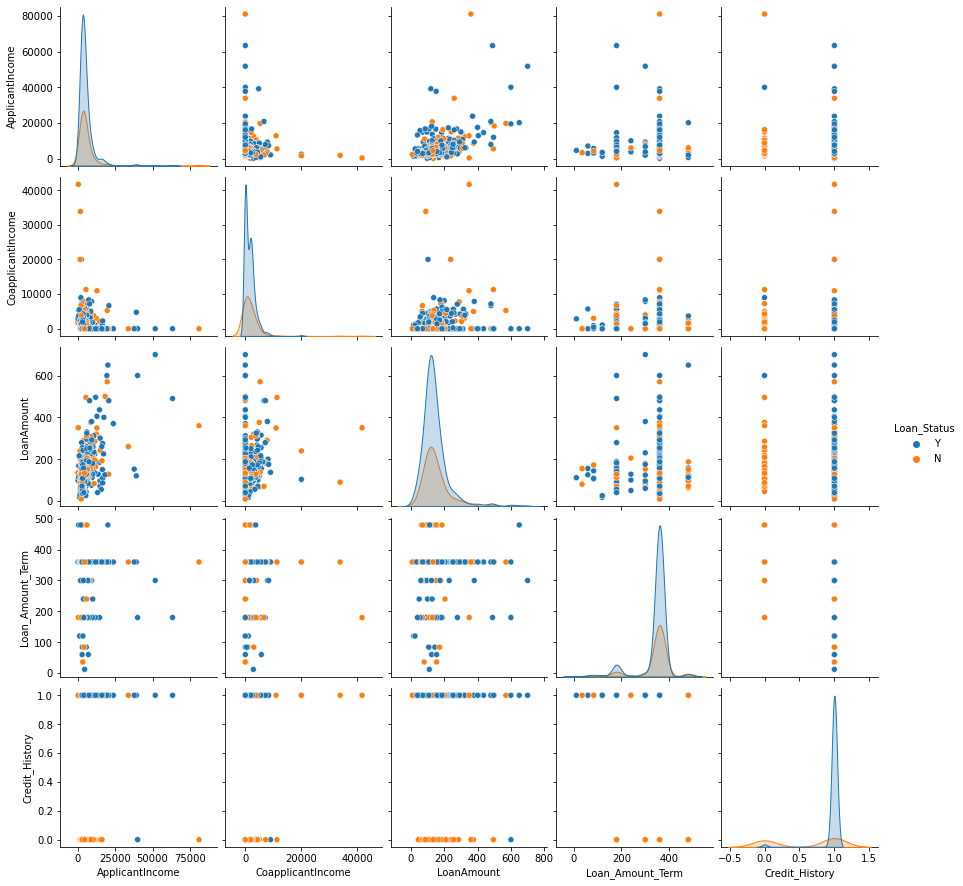

In [366]:
sns.pairplot(df,hue='Loan_Status')


<AxesSubplot:xlabel='Dependents', ylabel='count'>

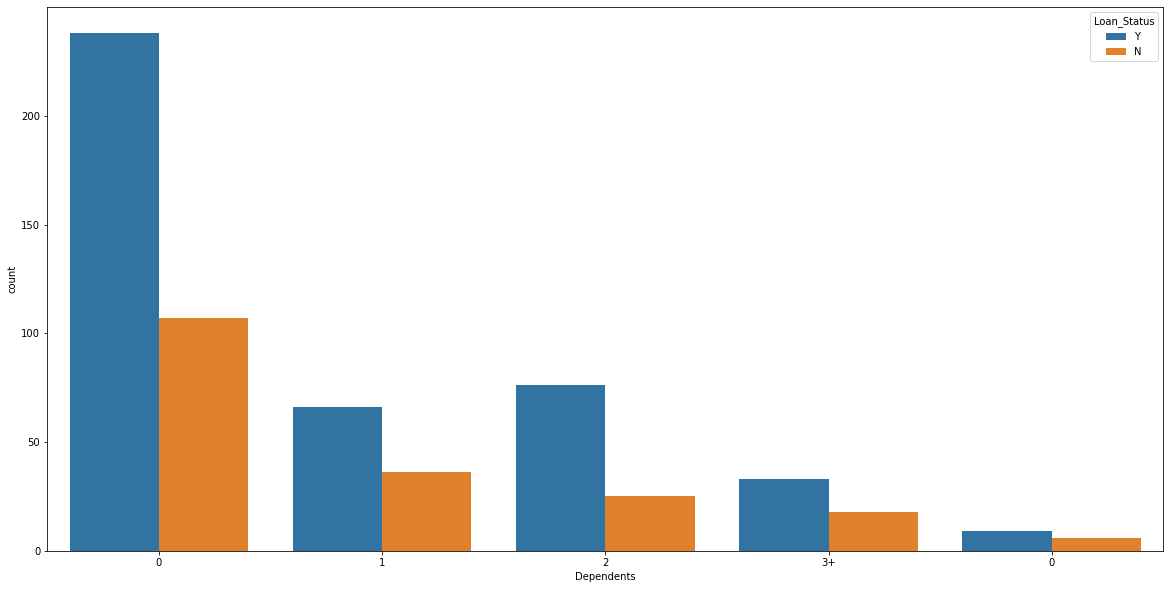

In [367]:
# dependents vs Loan_Status

plt.figure(figsize=(20,10))
sns.countplot(df.Dependents,hue=df.Loan_Status)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

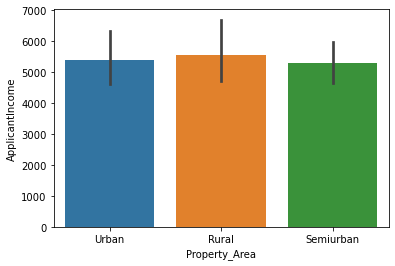

In [368]:
sns.barplot(df.Property_Area,df.ApplicantIncome)

from above graph it shows that applicant imcome doesnt depend upon property area

<AxesSubplot:>

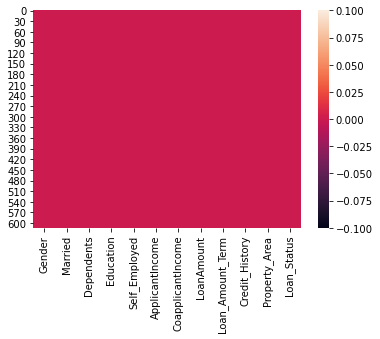

In [369]:
sns.heatmap(df.isna())

## Removing the outliers


In [370]:
outliers = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

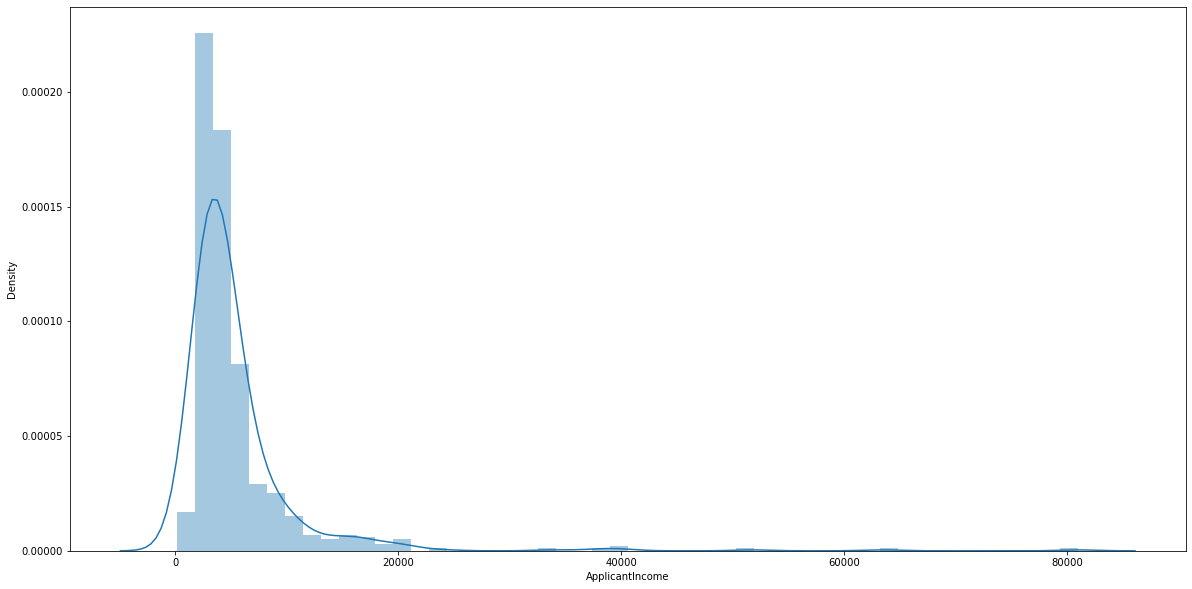

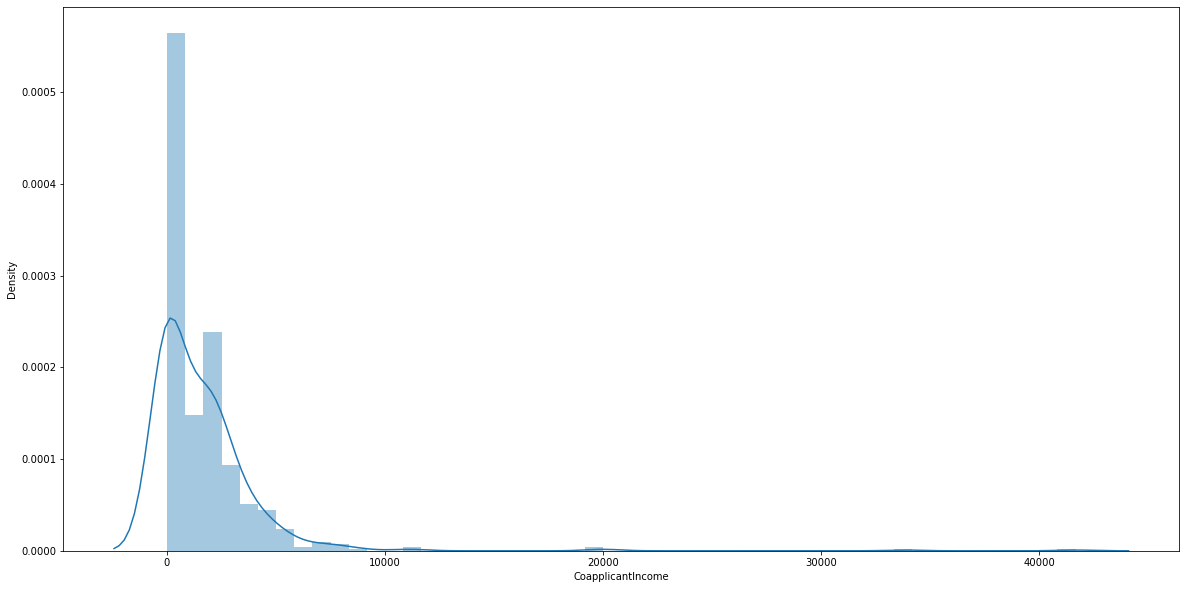

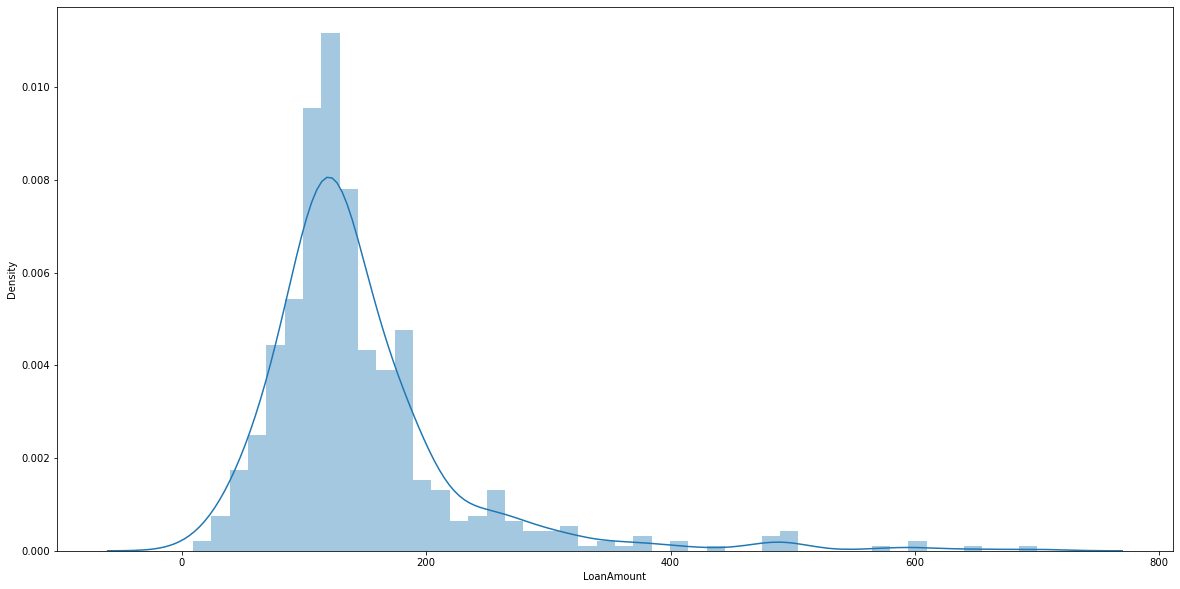

In [371]:
for col in outliers:
    
    plt.figure(figsize=(20,10))
    sns.distplot(df[col])

# Almost all of the features are highly positively skewed

In [372]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

these columns are highly skewed

In [373]:
# let's remove the values in the IQR method:
Q1 = df[outliers].quantile(0.25)
Q3 = df[outliers].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
dtype: float64


In [374]:
df = df[~((df[outliers] < (Q1 - 1.5 * IQR)) |(df[outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [375]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [376]:
# we now need to use skew tranformation 

In [377]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [378]:
np.log(df[skew]+1).skew()

ApplicantIncome     -0.982387
CoapplicantIncome   -0.255735
LoanAmount          -1.319263
dtype: float64

In [379]:
np.sqrt(df[skew]).skew()

ApplicantIncome      0.455680
CoapplicantIncome    0.070591
LoanAmount          -0.279620
dtype: float64

In [380]:
 #let's continue with the transformation
df[skew] = np.sqrt(df[skew])

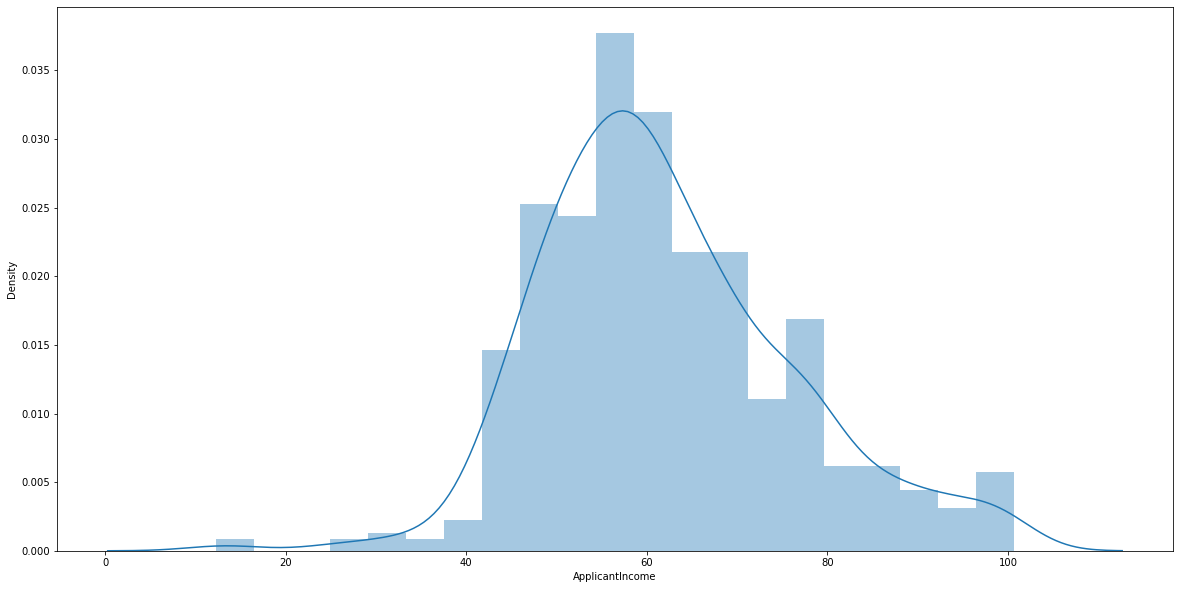

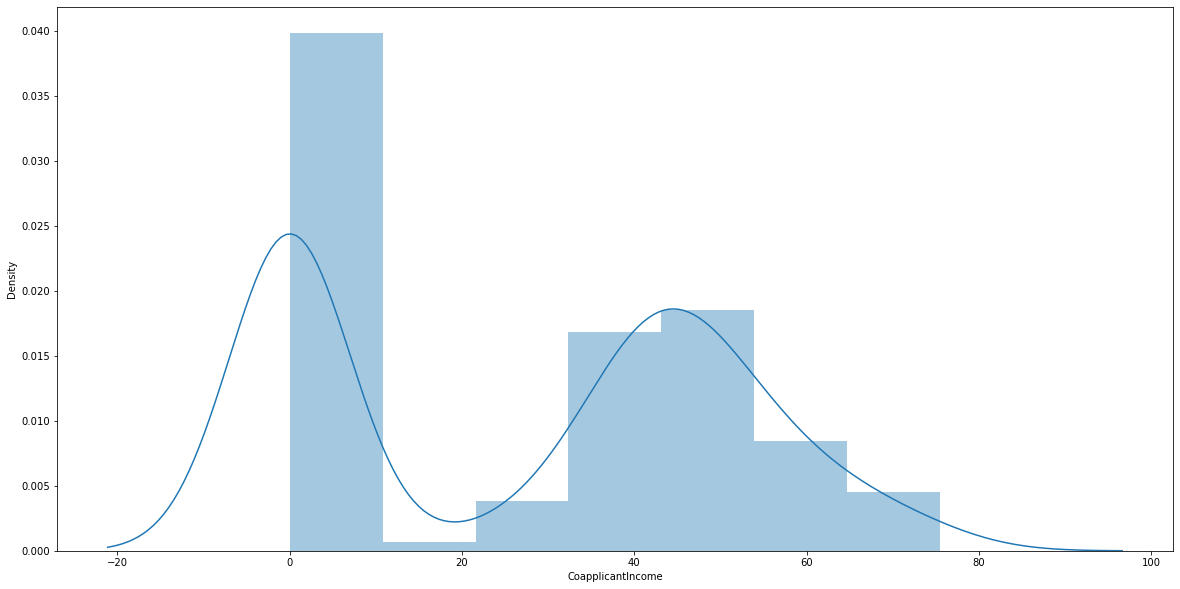

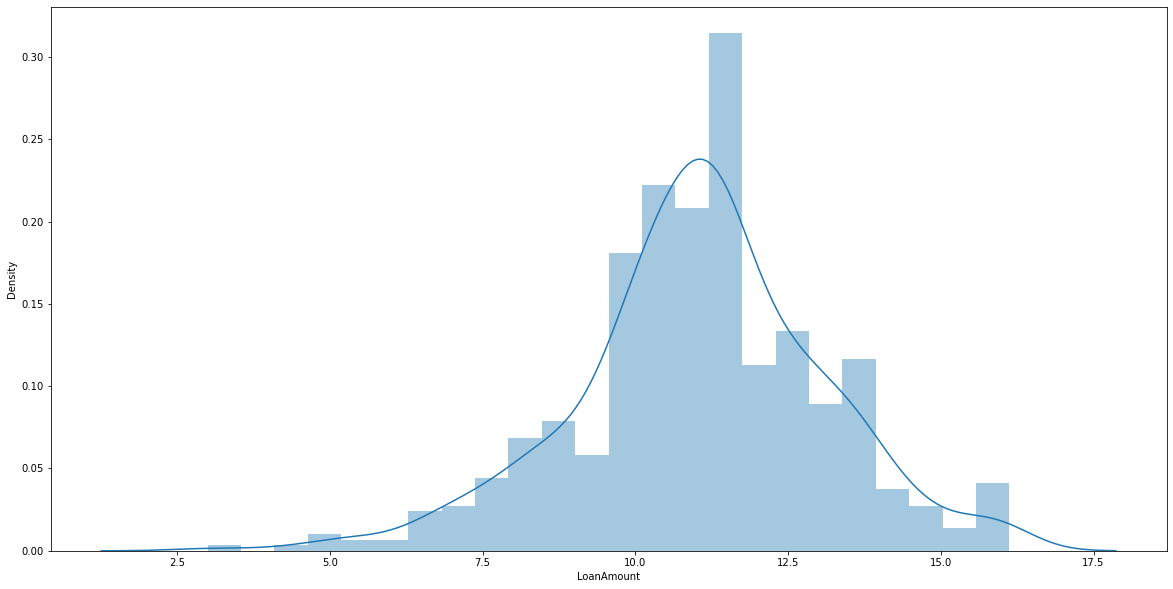

In [381]:
for col in skew:
    plt.figure(figsize=(20,10))
    sns.distplot(df[col])

now it looks normally distributed as now we need encode and scale the data to make it ready.

In [382]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,53.851648,0.000000,8.426150,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,64.078077,0.000000,6.324555,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,89.844310,15.491933,15.905974,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,87.080423,0.000000,13.674794,360.0,1.0,Urban,Y


In [383]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Education']=LE.fit_transform(df['Education'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

In [384]:
df['Dependents'] =pd.get_dummies(df['Dependents'], drop_first=True) 
df['Property_Area'] =pd.get_dummies(df['Property_Area'], drop_first=True)


In [385]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,0,76.478755,0.000000,11.313708,360.0,1.0,0,1
1,1,1,0,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,1,0,1,54.772256,0.000000,8.124038,360.0,1.0,0,1
3,1,1,1,1,0,50.823223,48.559242,10.954451,360.0,1.0,0,1
4,1,0,1,0,0,77.459667,0.000000,11.874342,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
610,1,1,0,0,0,64.078077,0.000000,6.324555,180.0,1.0,0,1
611,1,1,0,0,0,89.844310,15.491933,15.905974,360.0,1.0,0,1
612,1,1,0,0,0,87.080423,0.000000,13.674794,360.0,1.0,0,1


converted all categorcal data to numerical data

## X and y train / test split

In [386]:
df.shape

(535, 12)

In [387]:
# splitting X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [388]:
X.shape,y.shape

((535, 11), (535,))

In [389]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((374, 11), (374,), (161, 11), (161,))

In [390]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [391]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((374, 11), (161, 11), (374,), (161,))

## Building up the model

In [392]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier


In [393]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [394]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [395]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8012422360248447
[[34 17]
 [15 95]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        51
           1       0.85      0.86      0.86       110

    accuracy                           0.80       161
   macro avg       0.77      0.77      0.77       161
weighted avg       0.80      0.80      0.80       161



In [396]:
from sklearn.linear_model import LinearRegression

In [397]:
lrg=LogisticRegression()
lrg.fit(X_train,y_train)
lrg.score(X_train,y_train)
predlrg=lrg.predict(X_test)
print(accuracy_score(y_test,predlrg))
print(confusion_matrix(y_test,predlrg))
print(classification_report(y_test,predlrg))

0.8385093167701864
[[ 25  26]
 [  0 110]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.89       110

    accuracy                           0.84       161
   macro avg       0.90      0.75      0.78       161
weighted avg       0.87      0.84      0.82       161



In [398]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8074534161490683
[[ 24  27]
 [  4 106]]
              precision    recall  f1-score   support

           0       0.86      0.47      0.61        51
           1       0.80      0.96      0.87       110

    accuracy                           0.81       161
   macro avg       0.83      0.72      0.74       161
weighted avg       0.82      0.81      0.79       161



In [399]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8074534161490683
[[ 23  28]
 [  3 107]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.79      0.97      0.87       110

    accuracy                           0.81       161
   macro avg       0.84      0.71      0.74       161
weighted avg       0.82      0.81      0.79       161



In [400]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [401]:
svmkernel('rbf')

0.8385093167701864
[[ 25  26]
 [  0 110]]
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.89       110

    accuracy                           0.84       161
   macro avg       0.90      0.75      0.78       161
weighted avg       0.87      0.84      0.82       161



In [402]:
# Predicted values
y_head_lrg = lrg.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svc = svc.predict(X_test)
y_head_dtc = dtc.predict(X_test)


In [403]:
from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(y_test,y_head_lrg)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

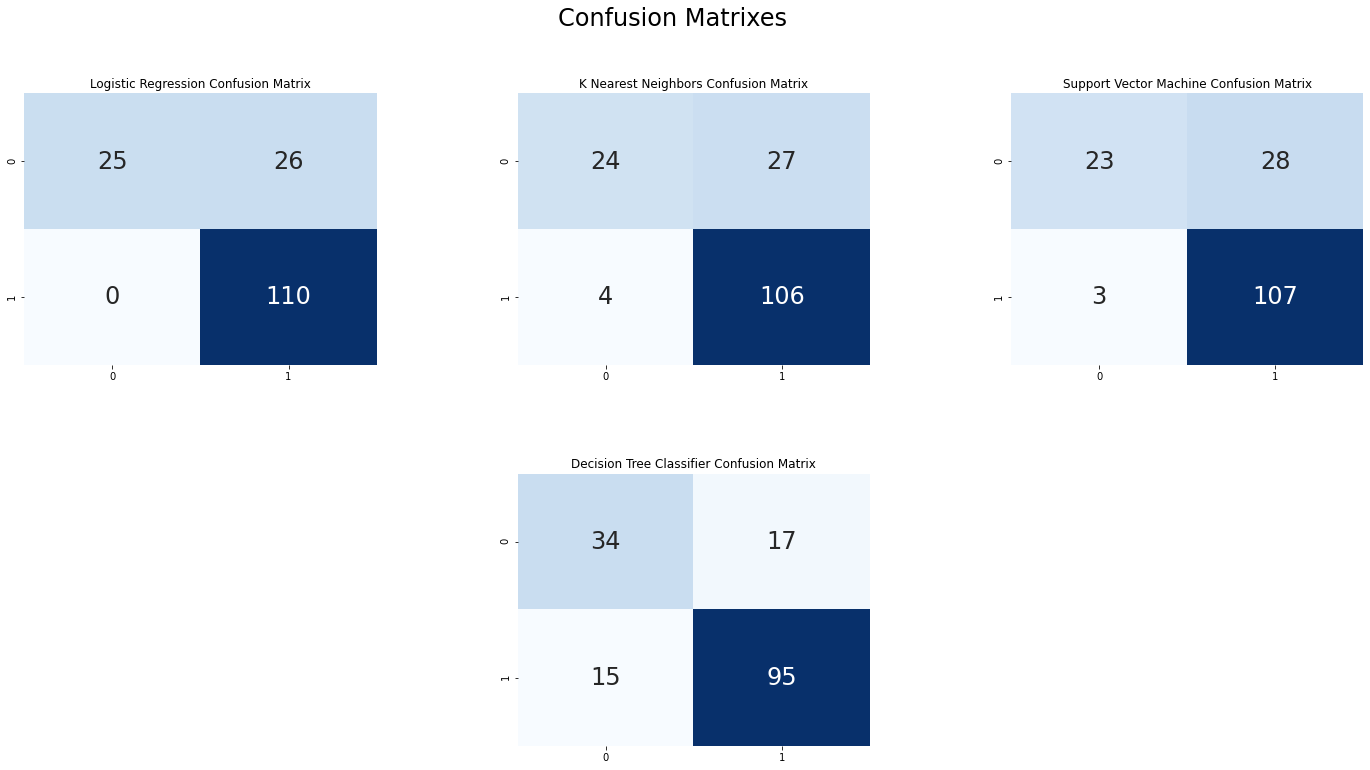

In [404]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [405]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [406]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_test,y_test))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test)))
    print('Precision:',recall_score(y_test,model.predict(X_test)))
    print('F1:',recall_score(y_test,model.predict(X_test)))


In [407]:
# logistic regression
train_n_ret_score(LogisticRegression(max_iter=1000,C=10))

0.8385093167701864

In [408]:
# svc
train_n_ret_score(SVC())

0.8385093167701864

In [409]:
# decision tree
train_n_ret_score(DecisionTreeClassifier())

0.7950310559006211

In [410]:
# Adaboost
train_n_ret_score(AdaBoostClassifier(base_estimator=LogisticRegression()))

0.8322981366459627

In [411]:
# KNN
train_n_ret_score(KNeighborsClassifier())

0.8074534161490683

In [412]:
# Random Forest
train_n_ret_score(RandomForestClassifier())

0.84472049689441

In [413]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


In [414]:
knn=KNeighborsClassifier()
svc=SVC()
lrg=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=56)
gnb=GaussianNB()
rfc=RandomForestClassifier(random_state=56)
gbc=GradientBoostingClassifier(random_state=56)
abc=AdaBoostClassifier(random_state=56)
etc=ExtraTreesClassifier(random_state=56)

In [415]:
models = []
models.append(('KNeighborsClassifier', knn))
models.append(('SVC', svc))
models.append(('LogisticRegression', lrg))
models.append(('DecisionTreeClassifier', dtc))
models.append(('GaussianNB', gnb))
models.append(('RandomForestClassifier', rfc))
models.append(('GradientBoostingClassifier', gbc))
models.append(('ExtraTreesClassifier',etc))
models.append(('AdaBoostClassifier',abc))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.8074534161490683


Cross_Val_Score =  0.6745981830887492


roc_auc_score =  0.7171122994652406


classification_report
               precision    recall  f1-score   support

           0       0.86      0.47      0.61        51
           1       0.80      0.96      0.87       110

    accuracy                           0.81       161
   macro avg       0.83      0.72      0.74       161
weighted avg       0.82      0.81      0.79       161



[[ 24  27]
 [  4 106]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.8385093167701864


Cross_Val_Score =  0.6953529000698813


roc_auc_score =  0.7450980392156863


classification_report
               precision    recall  f1-score   support

           0       1.00      0.49      0.66        51
           1       0.81      1.00      0.89       110



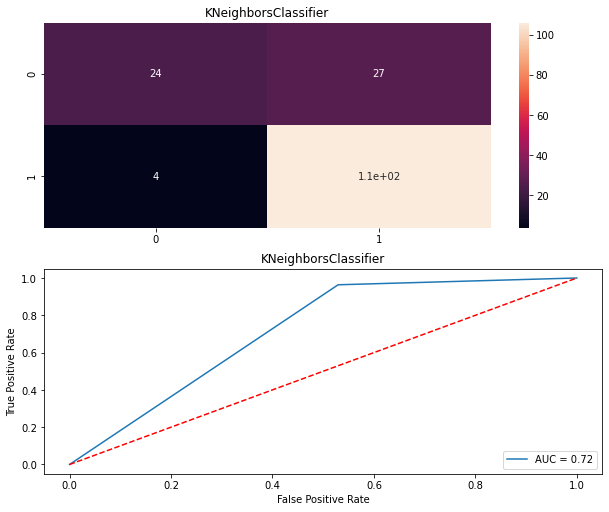

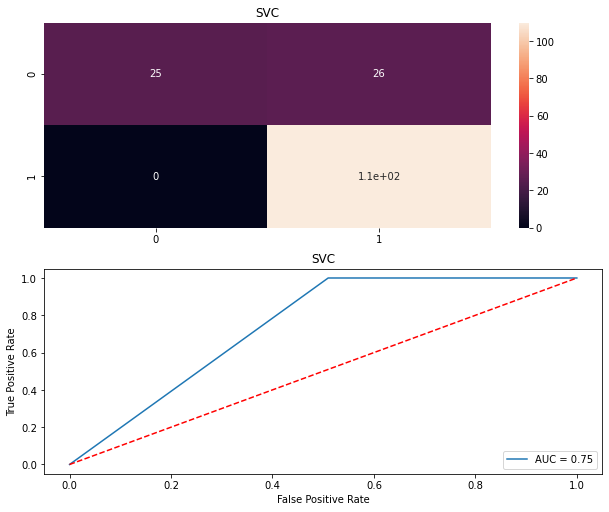

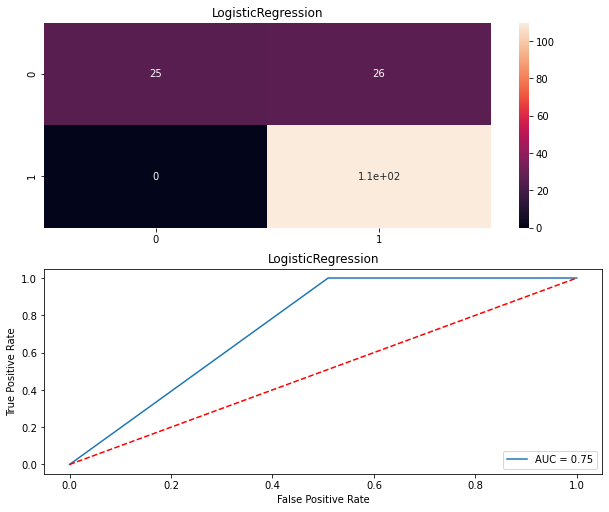

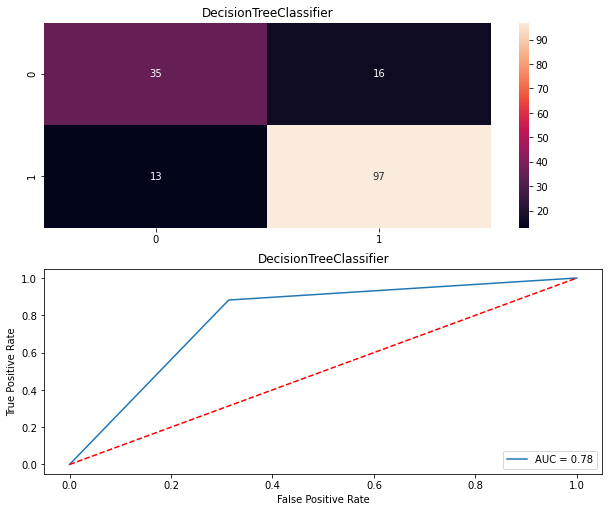

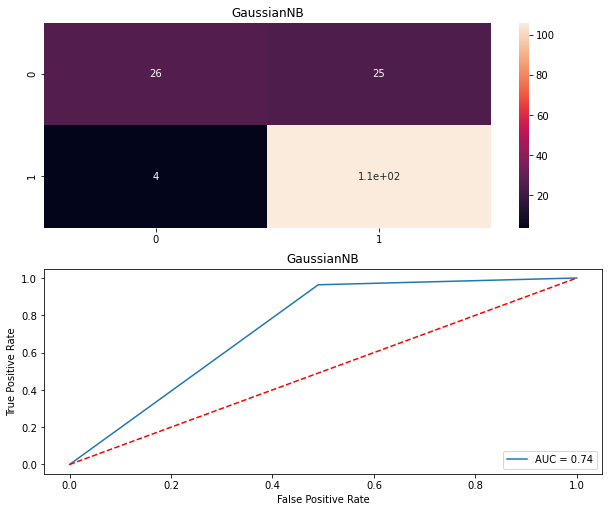

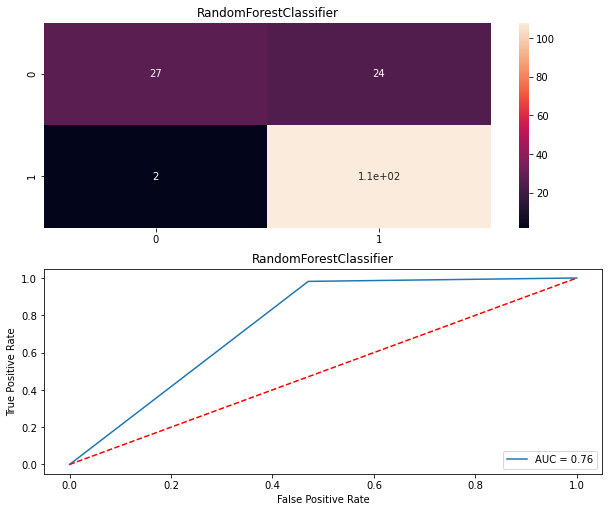

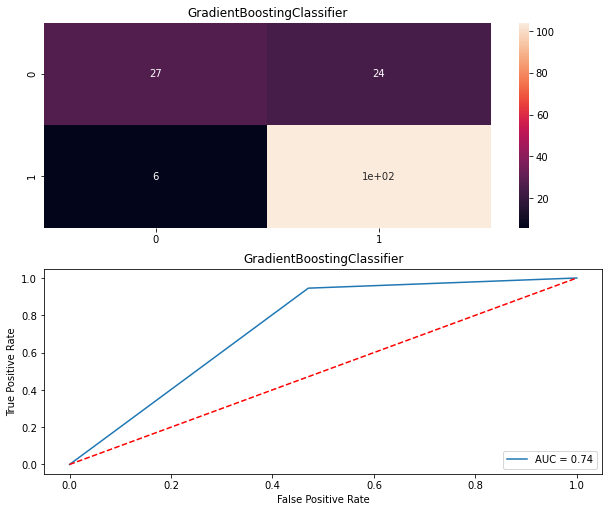

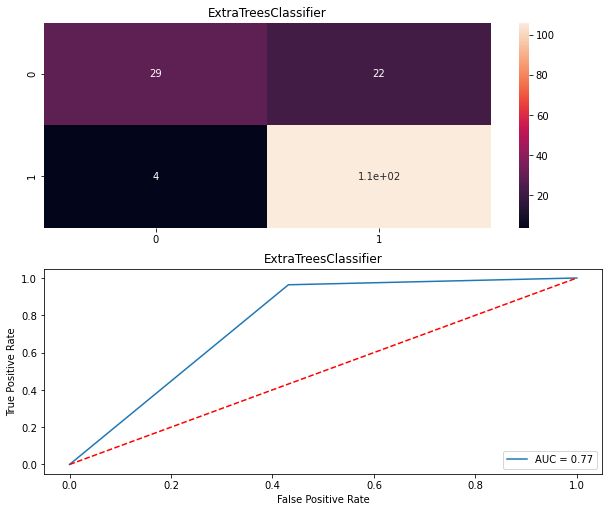

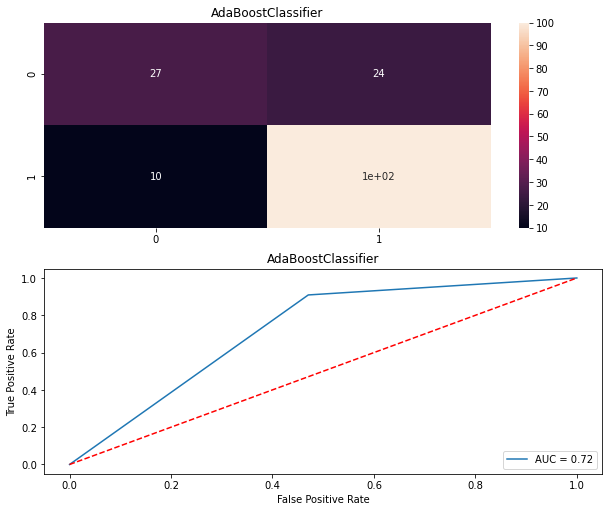

In [416]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [418]:
# choosing the best model


models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [419]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.812834,0.838509,0.838509,0.838509,0.838509,0.815459
1,SVC,0.815508,0.838509,0.838509,0.838509,0.838509,0.815459
2,KNN,0.820856,0.807453,0.807453,0.807453,0.807453,0.775315
3,Random_forest,1.000000,0.807453,0.807453,0.807453,0.807453,0.708577
4,Decision_Treee,1.000000,0.844720,0.844720,0.844720,0.844720,0.788793
5,Gradient_boost,0.954545,0.813665,0.813665,0.813665,0.813665,0.770018
6,Adaboost,1.000000,0.826087,0.826087,0.826087,0.826087,0.802126


* After training n number of models, we can finally conclude that the decision tree is working th best in this case.

In [417]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.807453,0.674598,0.717112
1,SVC,0.838509,0.695353,0.745098
2,LogisticRegression,0.838509,0.818868,0.745098
3,DecisionTreeClassifier,0.819876,0.734941,0.784046
4,GaussianNB,0.819876,0.820790,0.736720
5,RandomForestClassifier,0.838509,0.805835,0.755615
6,GradientBoostingClassifier,0.813665,0.794514,0.737433
7,ExtraTreesClassifier,0.838509,0.775821,0.766132
8,AdaBoostClassifier,0.788820,0.796366,0.719251


In [420]:
# Lets try tuning the logistic Regression model
from sklearn.model_selection import GridSearchCV

In [421]:
param_dict = {
    'C':[1.0,10,100],
    'kernel':['rbg','linear'],
    'gamma':['scale',0.1,0.01,0.001]
    
}

In [422]:
gs_model = GridSearchCV(SVC(),param_grid=param_dict,verbose=2)

In [423]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1.0, gamma=scale, kernel=rbg ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.1s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=1.0, gamma=0.001, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV] ................ C=1.0, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV] ................ C=1.0, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV] ................ C=1.0, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV] ................ C=1.0, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=0.001, kernel=linear ...............................
[CV] ................ C=1.0, gamma=0.001, kernel=linear, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbg', 'linear']},
             verbose=2)

In [424]:
gs_model.best_estimator_

SVC(kernel='linear')

In [425]:
gs_model.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [426]:
gs_model.best_score_

0.8154594594594595

In [429]:
best_model = SVC(kernel='linear')

In [430]:
best_model.fit(X_train,y_train)

SVC(kernel='linear')

In [431]:
train_n_ret_scores(best_model)

Train_Acc: 0.8385093167701864
Test_Acc: 0.8385093167701864
Recall: 1.0
Precision: 1.0
F1: 1.0


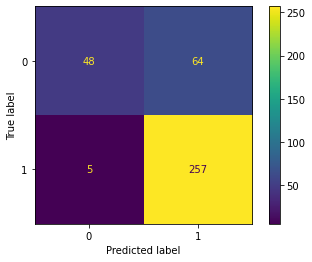

In [432]:
plot_confusion_matrix(best_model,X_train,y_train)

# saving the best model

In [434]:

import joblib 
joblib.dump(best_model,'loan_prediction.pkl')

['loan_prediction.pkl']